Plot saved successfully to '/workspace/data/analysis_logs/ex_20250116_organaized_split/Graphs/accuracy_chart_ASD.png'.


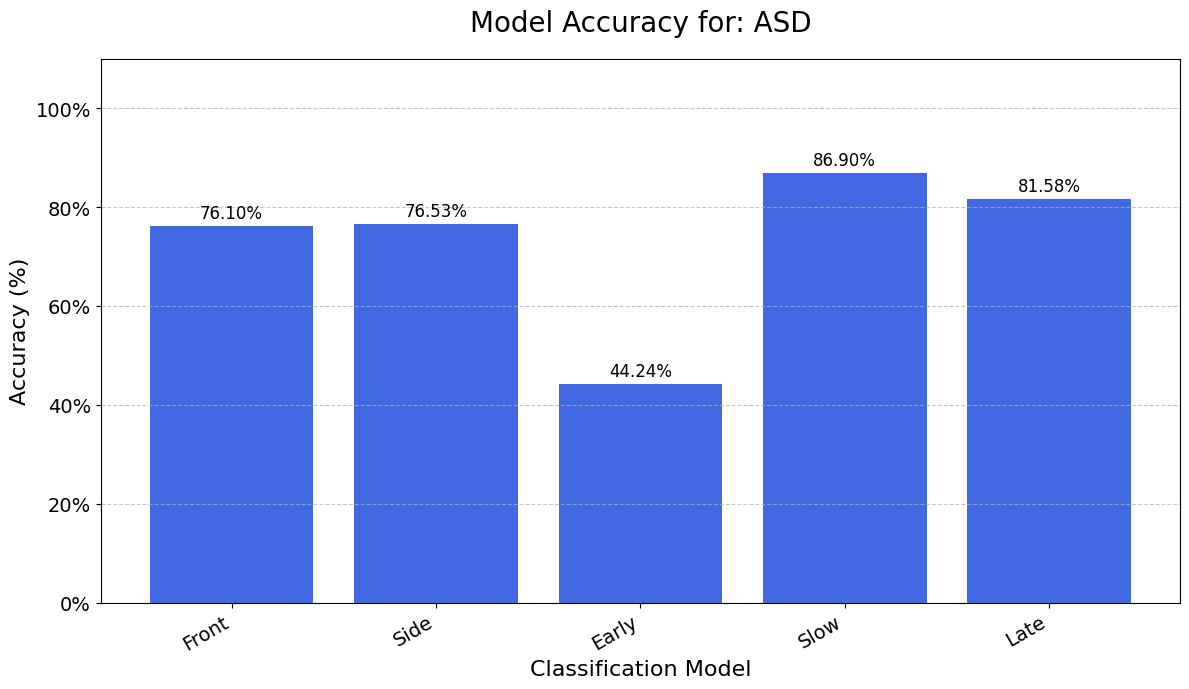

Plot saved successfully to '/workspace/data/analysis_logs/ex_20250116_organaized_split/Graphs/accuracy_chart_DHS.png'.


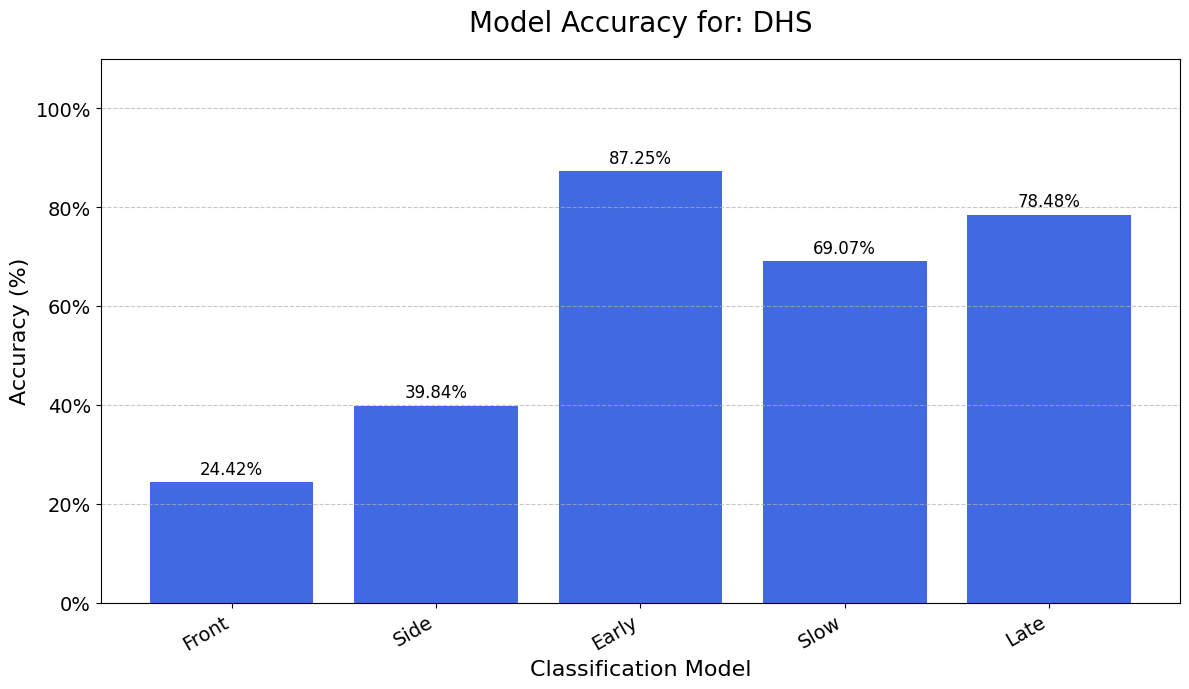

Plot saved successfully to '/workspace/data/analysis_logs/ex_20250116_organaized_split/Graphs/accuracy_chart_HipOA.png'.


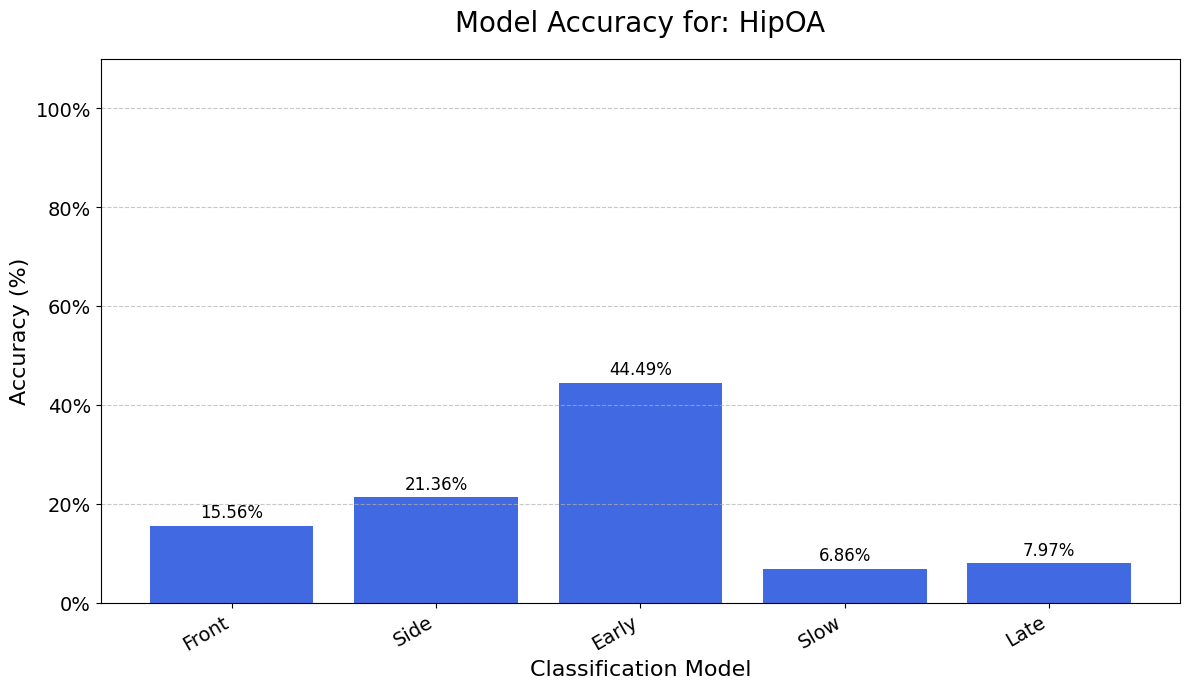

Plot saved successfully to '/workspace/data/analysis_logs/ex_20250116_organaized_split/Graphs/accuracy_chart_LCS.png'.


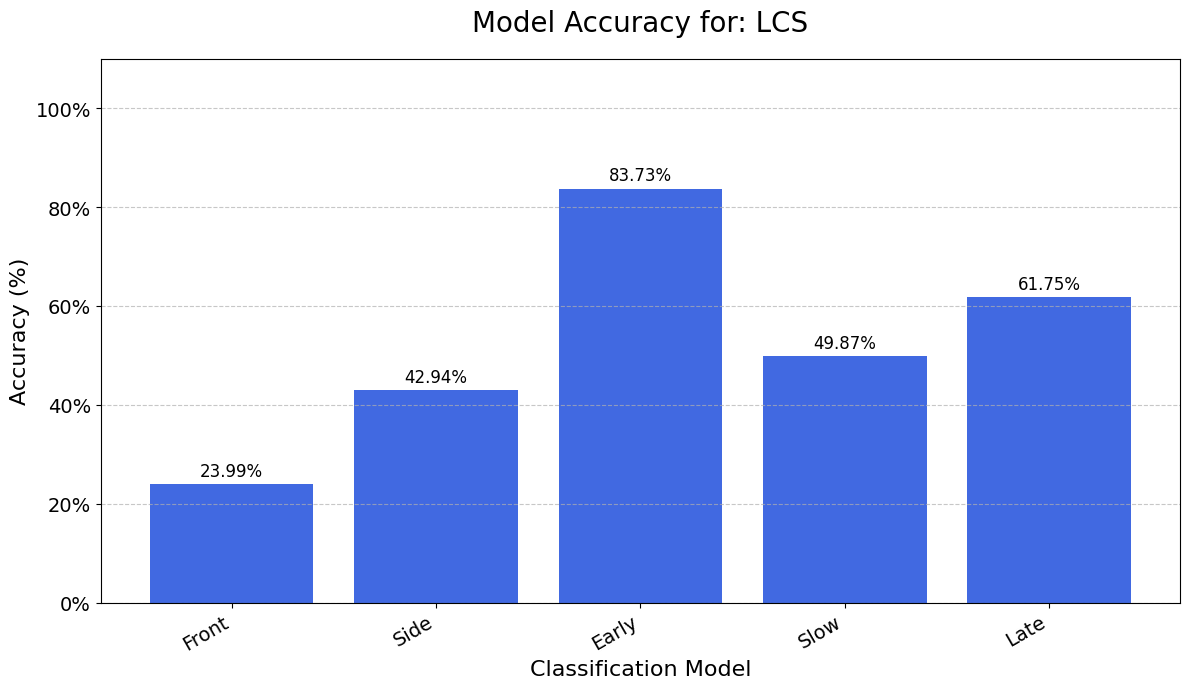

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # Import the ticker module
import numpy as np
import re

# --- お手持ちのデータに書き換える部分 ---

# 1. 横軸：比較したい分類モデルのリスト
models = [
    'Front',
    'Side',
    'Early',
    'Slow',
    'Late'
]

# 2. 症例ごとの正解率データ
#    「'症例名': [モデルごとの正解率リスト]」の形式で入力します。
#    正解率リストの要素数は、上のmodelsリストの要素数と一致させてください。
accuracies_by_case = {
    'ASD':   [0.7610, 0.7653, 0.4424, 0.8690, 0.8158],
    'DHS':     [0.2442, 0.3984, 0.8725, 0.6907, 0.7848],
    'HipOA':   [0.1556, 0.2136, 0.4449, 0.0686, 0.0797],
    'LCS':   [0.2399, 0.4294, 0.8373, 0.4987, 0.6175]
}

# 3. Specify a prefix for the output filenames.
#    The final filename will be like: 'prefix_CaseName.png'
output_file_prefix = '/workspace/data/analysis_logs/ex_20250116_organaized_split/Graphs/accuracy_chart'


# --- FONT SIZE SETTINGS ---
# Adjust the font sizes for different parts of the plot here.
title_fontsize = 20
axis_label_fontsize = 20
tick_label_fontsize = 16  # For numbers on X and Y axes
bar_label_fontsize = 16   # For numbers on top of the bars


# --- DO NOT EDIT BELOW THIS LINE ---

if not models or not accuracies_by_case:
    print("Data is missing. Please edit the 'models' and 'accuracies_by_case' variables.")
else:
    for case_name, accuracies in accuracies_by_case.items():
        
        fig, ax = plt.subplots(figsize=(12, 7)) # Increased figure size for better spacing
        
        bars = ax.bar(models, accuracies, color='royalblue')
        
        # Apply font size to bar labels
        ax.bar_label(bars, padding=3, fmt=lambda x: f'{x*100:.2f}%', fontsize=bar_label_fontsize)

        # Apply font sizes to plot elements
        ax.set_xlabel('Classification Model', fontsize=axis_label_fontsize)
        ax.set_ylabel('Accuracy (%)', fontsize=axis_label_fontsize)
        ax.set_title(f'Model Accuracy for: {case_name}', fontsize=title_fontsize, pad=20)
        
        ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
        
        # Apply font size to tick labels on both axes
        ax.tick_params(axis='y', labelsize=tick_label_fontsize)
        plt.xticks(rotation=30, ha='right', fontsize=tick_label_fontsize)
        
        ax.set_ylim(0, 1.1) 
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        fig.tight_layout()

        safe_case_name = re.sub(r'[^a-zA-Z0-9_]', '_', case_name)
        filename = f"{output_file_prefix}_{safe_case_name}.png"
        
        try:
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            print(f"Plot saved successfully to '{filename}'.")
        except Exception as e:
            print(f"An error occurred while saving '{filename}': {e}")

        plt.show()